# Anomaly Detection Examples with R carData Davis dataset

井出剛著「入門 機械学習による異常検知〜Rによる実践ガイド」P23-26 の例

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import japanize_matplotlib

%matplotlib inline

## データの読み込みと確認

使用されているのがRのライブラリに添付されたデータセットであるため下記のサイトからダウンロード

In [2]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv'
df = pd.read_csv(url, index_col=0)

In [3]:
df

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
6,M,76,170,76.0,165.0
7,M,76,167,77.0,165.0
8,M,69,186,73.0,180.0
9,M,71,178,71.0,175.0
10,M,65,171,64.0,170.0


## データをプロットして確認

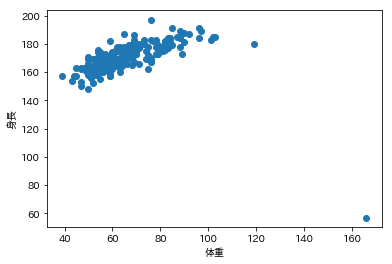

In [4]:
plt.scatter(df['weight'], df['height'])
plt.xlabel('体重')
plt.ylabel('身長')
plt.show()

## NumPy による計算例

### データの中心化

In [5]:
x = np.array(df[['weight','height']])
xc = x - np.average(x, axis=0)

### 共分散行列の計算

In [6]:
sx = np.cov(xc, rowvar=False)
sx

array([[227.85929648,  34.3758794 ],
       [ 34.3758794 , 144.19055276]])

### 異常度の計算

In [7]:
a = np.sum(xc.dot(np.linalg.inv(sx)) * xc,axis=1)
a

array([1.31229390e+00, 7.09558736e-01, 1.08056095e+00, 3.39196520e-01,
       1.23785556e+00, 4.74078396e-01, 6.06109473e-01, 1.77268502e+00,
       4.91141867e-01, 1.15244573e-02, 2.13317773e-01, 1.62180931e+02,
       1.29269557e+00, 3.62118059e-02, 1.01120162e+00, 1.12190901e-01,
       4.23347031e+00, 7.84293981e-02, 5.11295017e+00, 3.35188992e-01,
       1.24484664e+01, 1.04682016e-01, 1.89975811e-01, 6.27741165e-02,
       6.65887973e-01, 1.11485117e+00, 3.69761889e-02, 3.25164080e-01,
       3.73183952e+00, 5.86091014e+00, 2.84730421e-01, 6.84073751e-01,
       7.71713191e-01, 9.47346542e-01, 3.43892377e-02, 2.95375429e-01,
       4.67956935e-01, 1.32927431e-01, 2.31718492e+00, 2.10658059e+00,
       7.40397703e-01, 1.13009704e+00, 3.47548633e-01, 1.54589674e+00,
       1.88407496e+00, 1.09951131e+00, 7.96549903e-01, 1.54124947e+00,
       8.49775656e-01, 1.00819653e+00, 1.80595254e+00, 5.11718524e-01,
       3.31743938e-01, 6.40291199e+00, 3.92517010e-01, 2.70558721e-01,
      

### 閾値の取得

カイ2乗分布の95%分位点を求め、閾値とする。

In [8]:
th = stats.chi2.ppf(0.95, 1)

## 異常値のプロット

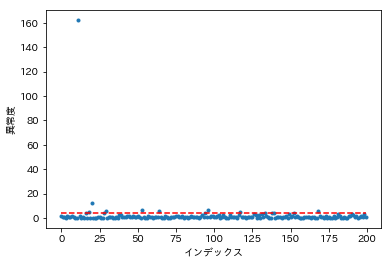

In [9]:
plt.plot(a, '.')
plt.plot(np.repeat(th, len(x)), 'r--')
plt.xlabel('インデックス')
plt.ylabel('異常度')
plt.show()

## Scikit-Learnを使った別解

### EmpiricalCovariance での計算

In [10]:
from sklearn.covariance import EmpiricalCovariance

In [11]:
emp_cov = EmpiricalCovariance()
mahala_cov = emp_cov.fit(x)

In [12]:
mahala_cov.covariance_

array([[226.72  ,  34.204 ],
       [ 34.204 , 143.4696]])

#### ライブラリのマハラノビス距離のプロット

In [13]:
a = mahala_cov.mahalanobis(x - mahala_cov.location_)

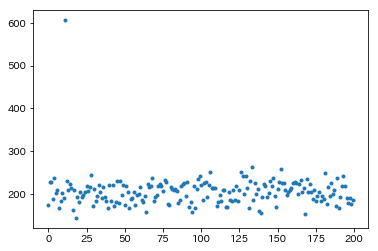

In [14]:
plt.plot(a,'.')
plt.show()

#### NumPy での計算と同様の計算によるプロット

In [15]:
a2 = np.sum((x - mahala_cov.location_).dot(mahala_cov.precision_) * (x - mahala_cov.location_), axis=1)

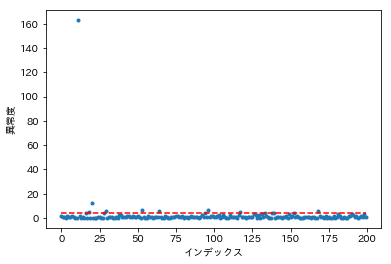

In [16]:
plt.plot(a2,'.')
plt.plot(np.repeat(th, len(x)), 'r--')
plt.xlabel('インデックス')
plt.ylabel('異常度')
plt.show()

### 外れ値の影響が少ないロバストな計算例

In [17]:
from sklearn.covariance import MinCovDet

robast_cov = MinCovDet()
robast_dist_cov = robast_cov.fit(x)

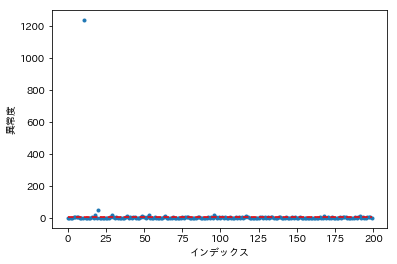

In [18]:
plt.plot(robast_dist_cov.dist_, '.')
plt.plot(np.repeat(th, len(x)), 'r--')
plt.xlabel('インデックス')
plt.ylabel('異常度')
plt.show()